In [15]:
# importing the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [16]:
# set NumPy options
np.set_printoptions(suppress=True)
pd.set_option('display.max_rows', 20)

In [17]:
# read CSV data with Pandas
data = pd.read_csv("data/china_population.csv")

In [18]:
# setup data column
data.columns = ["V" + str(i) for i in range(1, len(data.columns) + 1)]
# independent variables data
X = data.loc[:, "V1":"V12"]
# dependent variable data
y = data.V13

In [19]:
print("## Data:")
print(data)

## Data:
      V1          V2    V3        V4      V5    V6    V7   V8    V9  \
0   2020  1439323776  0.39   5540090 -348399  38.4  1.69  153  60.8   
1   2019  1433783686  0.43   6135900 -348399  37.0  1.65  153  59.7   
2   2018  1427647786  0.47   6625995 -348399  37.0  1.65  152  58.6   
3   2017  1421021791  0.49   6972440 -348399  37.0  1.65  151  57.5   
4   2016  1414049351  0.51   7201481 -348399  37.0  1.65  151  56.3   
5   2015  1406847870  0.55   7607451 -310442  36.7  1.64  150  55.1   
6   2010  1368810615  0.57   7606847 -435677  35.0  1.62  146  48.9   
7   2005  1330776380  0.62   8045123 -393116  32.6  1.61  142  42.2   
8   2000  1290550765  0.79   9926046  -76600  30.0  1.62  137  35.7   
9   1995  1240920535  1.07  12807372 -155996  27.4  1.83  132  30.9   
10  1990  1176883674  1.82  20258863  -86330  24.9  2.73  125  26.3   
11  1985  1075589361  1.47  15100025  -40000  23.5  2.52  115  22.8   
12  1980  1000089235  1.55  14769670   -9401  21.9  3.01  107  19.2 

In [20]:
print("## Head:")
print(data.head())

## Head:
     V1          V2    V3       V4      V5    V6    V7   V8    V9        V10  \
0  2020  1439323776  0.39  5540090 -348399  38.4  1.69  153  60.8  875075919   
1  2019  1433783686  0.43  6135900 -348399  37.0  1.65  153  59.7  856409297   
2  2018  1427647786  0.47  6625995 -348399  37.0  1.65  152  58.6  837022095   
3  2017  1421021791  0.49  6972440 -348399  37.0  1.65  151  57.5  816957613   
4  2016  1414049351  0.51  7201481 -348399  37.0  1.65  151  56.3  796289491   

     V11         V12  V13  
0  18.47  7794798739    1  
1  18.59  7713468100    1  
2  18.71  7631091040    1  
3  18.83  7547858925    1  
4  18.94  7464022049    1  


In [21]:
print("## Info:")
data.info()

## Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      18 non-null     int64  
 1   V2      18 non-null     int64  
 2   V3      18 non-null     float64
 3   V4      18 non-null     int64  
 4   V5      18 non-null     int64  
 5   V6      18 non-null     float64
 6   V7      18 non-null     float64
 7   V8      18 non-null     int64  
 8   V9      18 non-null     float64
 9   V10     18 non-null     int64  
 10  V11     18 non-null     float64
 11  V12     18 non-null     int64  
 12  V13     18 non-null     int64  
dtypes: float64(5), int64(8)
memory usage: 2.0 KB


p-value:	 4.314023782330023e-06
cor:		 -0.8617286512994904
           V1        V2        V3        V4        V5        V6        V7  \
V1   1.000000  0.988402 -0.890477 -0.659249 -0.777704  0.953335 -0.912711   
V2   0.988402  1.000000 -0.861729 -0.580571 -0.724647  0.912011 -0.949852   
V3  -0.890477 -0.861729  1.000000  0.895210  0.732022 -0.939094  0.872490   
V4  -0.659249 -0.580571  0.895210  1.000000  0.673160 -0.822290  0.572113   
V5  -0.777704 -0.724647  0.732022  0.673160  1.000000 -0.815520  0.580420   
V6   0.953335  0.912011 -0.939094 -0.822290 -0.815520  1.000000 -0.833693   
V7  -0.912711 -0.949852  0.872490  0.572113  0.580420 -0.833693  1.000000   
V8   0.988254  0.999950 -0.861095 -0.579417 -0.725716  0.911071 -0.950298   
V9   0.962813  0.913333 -0.907800 -0.785034 -0.831865  0.988199 -0.803617   
V10  0.969503  0.923780 -0.906068 -0.771593 -0.825220  0.988316 -0.817117   
V11 -0.885161 -0.808895  0.893030  0.863053  0.827303 -0.964640  0.688427   
V12  0.999202  0.

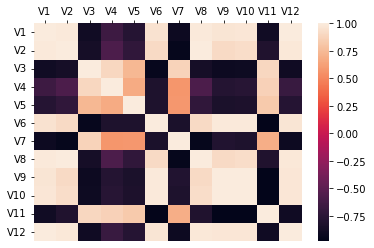

In [22]:
# calculating correlations for multivariate data
corr = stats.pearsonr(X.V2, X.V3)
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

corr_mat = X.corr()
print(corr_mat)

plt.figure()
sns.heatmap(corr_mat, vmax=1., square=False).xaxis.tick_top()
plt.show()

In [23]:
def most_highly_correlated(my_dataframe, num_to_report):
    # find the correlations
    cor_matrix = my_dataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cor_matrix *= np.tri(*cor_matrix.values.shape, k=-1).T
    # find the top n correlations
    cor_matrix = cor_matrix.stack()
    cor_matrix = cor_matrix.reindex(cor_matrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cor_matrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cor_matrix.head(num_to_report)


print(most_highly_correlated(X, 10))

  FirstVariable SecondVariable  Correlation
0            V2             V8     0.999950
1            V9            V10     0.999377
2            V1            V12     0.999202
3            V1             V2     0.988402
4            V6            V10     0.988316
5            V1             V8     0.988254
6            V6             V9     0.988199
7            V2            V12     0.984355
8            V8            V12     0.984047
9            V9            V11    -0.976744


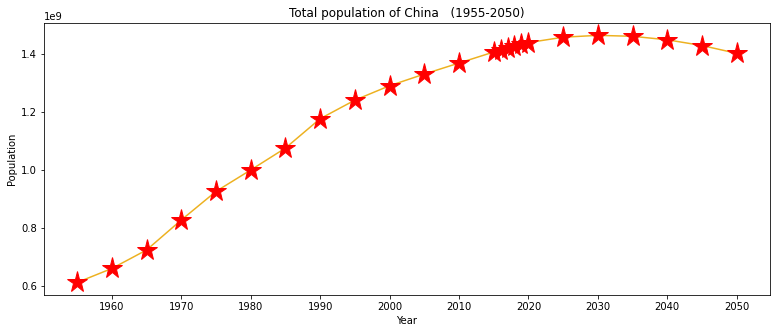

In [24]:
def print_total_population_China():
    df = pd.read_csv('data/china_population.csv')
    df_ = pd.read_csv('data/china_population_forecast.csv')
    city_list = pd.read_csv('data/city_population_china.csv')
    df_.sort_index(ascending=False, inplace=True)
    df = pd.concat([df_, df])
    df.reset_index(inplace=True)
    df.drop(index=6, inplace=True)
    x = df['Year']
    y = df['Population']
    plt.figure(figsize=(13,5))
    plt.plot(x,y,color='#EDB120')
    plt.plot(x,y,'*',color='r',markersize=22)
    plt.xlabel('Year')
    plt.xticks([1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030, 2040, 2050])
    plt.ylabel('Population')
    plt.yticks()
    plt.title('Total population of China   (1955-2050)')
    plt.show()
print_total_population_China()

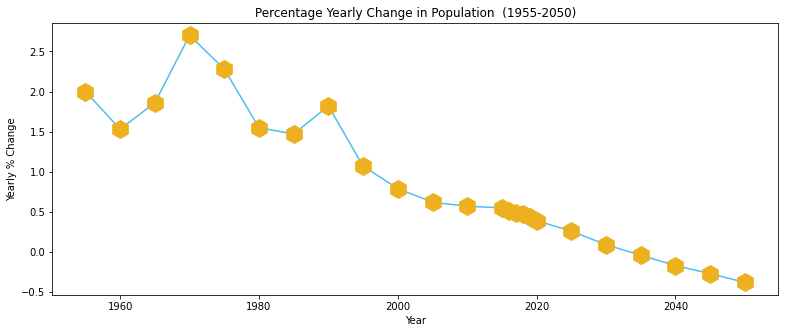

In [25]:
def print_percentage_yearly_change_Population():
    df = pd.read_csv('data/china_population.csv')
    df_ = pd.read_csv('data/china_population_forecast.csv')
    city_list = pd.read_csv('data/city_population_china.csv')
    df_.sort_index(ascending=False, inplace=True)
    df = pd.concat([df_, df])
    df.reset_index(inplace=True)
    df.drop(index=6, inplace=True)
    x = df['Year']
    y = df['Yearly % Change']
    plt.figure(figsize=(13,5))
    plt.plot(x,y,'#4DBEEE')
    plt.plot(x,y,'h',color='#EDB120',markersize=18)
    plt.xlabel('Year')
    plt.ylabel('Yearly % Change')
    plt.title('Percentage Yearly Change in Population  (1955-2050)')
    plt.show()
print_percentage_yearly_change_Population()

In [26]:
# standardising variables
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)

print(standardisedX.apply(np.mean))
print(standardisedX.apply(np.std))

V1     0.000000e+00
V2     1.233581e-17
V3    -1.233581e-17
V4    -2.582811e-17
V5    -3.700743e-17
V6     4.317534e-17
V7    -7.401487e-17
V8     4.934325e-17
V9     0.000000e+00
V10   -3.700743e-17
V11   -3.083953e-17
V12    1.233581e-17
dtype: float64
V1     1.0
V2     1.0
V3     1.0
V4     1.0
V5     1.0
V6     1.0
V7     1.0
V8     1.0
V9     1.0
V10    1.0
V11    1.0
V12    1.0
dtype: float64


d:\MSA\Lab3_ScikitLearn_and_PCA\Source\your-env\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [27]:
# principal component analysis
pca = PCA().fit(standardisedX)
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        print(summary)
    return summary


summary = pca_summary(pca, standardisedX)
print(summary.sdev)
print(np.sum(summary.sdev**2))

Importance of components:
                   sdev                varprop               cumprop
     Standard deviation Proportion of Variance Cumulative Proportion
PC1            3.246012           8.780496e-01              0.878050
PC2            0.915023           6.977220e-02              0.947822
PC3            0.644959           3.466439e-02              0.982486
PC4            0.432466           1.558559e-02              0.998072
PC5            0.116899           1.138788e-03              0.999211
PC6            0.080036           5.338099e-04              0.999744
PC7            0.047203           1.856787e-04              0.999930
PC8            0.025122           5.259399e-05              0.999983
PC9            0.012733           1.351132e-05              0.999996
PC10           0.005668           2.677586e-06              0.999999
PC11           0.003612           1.087345e-06              1.000000
PC12           0.000939           7.354552e-08              1.000000
      St

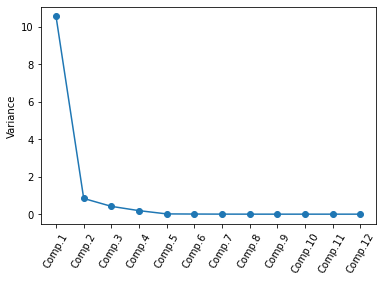

      Standard deviation
PC1         1.053660e+01
PC2         8.372664e-01
PC3         4.159727e-01
PC4         1.870271e-01
PC5         1.366546e-02
PC6         6.405718e-03
PC7         2.228144e-03
PC8         6.311279e-04
PC9         1.621358e-04
PC10        3.213104e-05
PC11        1.304814e-05
PC12        8.825462e-07


In [28]:
# how many principal components to retain
def scree_plot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()


plt.figure()
scree_plot(pca, standardisedX)

print(summary.sdev**2)

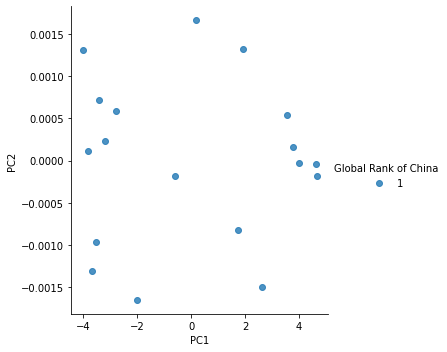

In [31]:
# scatter plots of the principal components
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 11], classifs)), columns=["PC1", "PC2", "Global Rank of China"])
    sns.lmplot(x="PC1", y="PC2", data=bar, hue="Global Rank of China", fit_reg=False)


pca_scatter(pca, standardisedX, y)